In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os,joblib,missingno
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression, Ridge, Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

#from sklearn.features.transformers import DataFrameSelector

In [2]:
###problem definition

In [3]:
File_path=os.path.join(os.getcwd(),'train.csv')
df_dimond=pd.read_csv(File_path)
df_dimond


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...,...
43035,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df_dimond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
df_dimond.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#1
df_dimond = df_dimond.drop('Unnamed: 0', axis=1)

In [7]:
df_dimond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


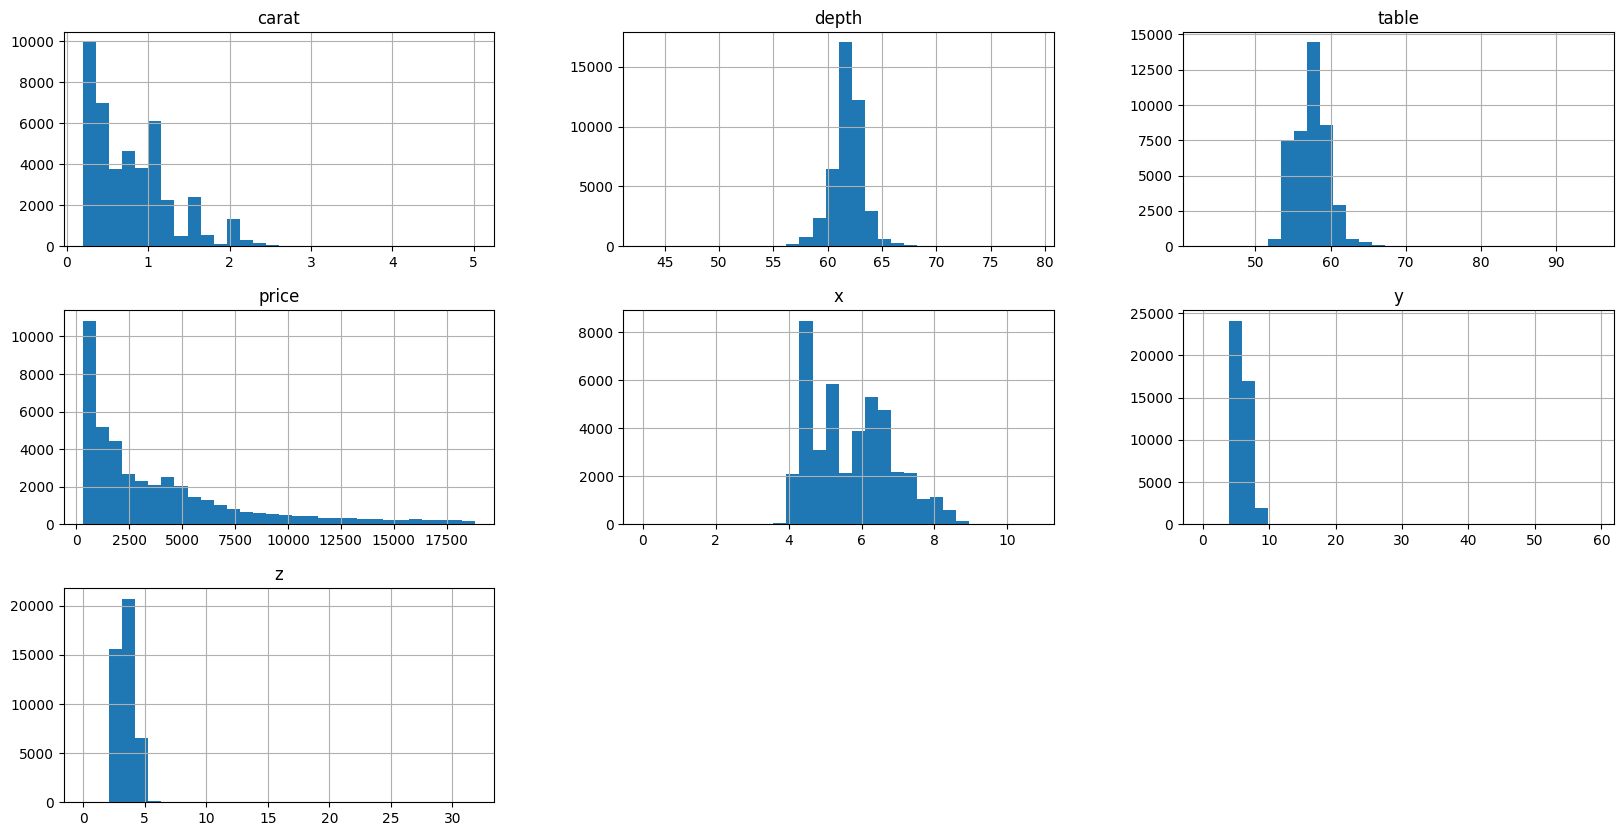

In [8]:
df_dimond.hist(bins=30,figsize=(20,10))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# استخراج الأعمدة الرقمية
numeric_columns = df_dimond.select_dtypes(include=['float64', 'int64']).columns

# عدد الصفوف والأعمدة في الشكل النهائي
rows = 1
cols = len(numeric_columns)

# إعداد المخططات المتعددة
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# رسم مخطط مربع الشوكة لكل عمود
for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(df_dimond[column])
    ax.set_title(column)

# تحسين تنسيق المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


In [ ]:
#3
# إزالة القيم غير المرغوب فيها في عمود 'carat'
df_dimond = df_dimond[(df_dimond['carat'] <= 1.9)]

# إزالة القيم غير المرغوب فيها في عمود 'depth'
df_dimond = df_dimond[(df_dimond['depth'] >= 59.5) & (df_dimond['depth'] <= 64.5)]

# إزالة القيم غير المرغوب فيها في عمود 'table'
df_dimond = df_dimond[(df_dimond['table'] >= 53) & (df_dimond['table'] <= 61)]

# إزالة القيم غير المرغوب فيها في عمود 'price'
df_dimond = df_dimond[(df_dimond['price'] <= 10000)]

#y
df_dimond = df_dimond[(df_dimond['y'] < 30)]

#y
df_dimond = df_dimond[(df_dimond['z'] < 30)]


In [ ]:

df_dimond.hist(bins=30,figsize=(20,10))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# استخراج الأعمدة الرقمية
numeric_columns = df_dimond.select_dtypes(include=['float64', 'int64']).columns

# عدد الصفوف والأعمدة في الشكل النهائي
rows = 1
cols = len(numeric_columns)

# إعداد المخططات المتعددة
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# رسم مخطط مربع الشوكة لكل عمود
for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(df_dimond[column])
    ax.set_title(column)

# تحسين تنسيق المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


In [ ]:
len(df_dimond)

In [ ]:
df_dimond.head(10)

In [ ]:
#لا يوجد null
df_dimond.isnull().sum()

In [ ]:
missingno.matrix(df_dimond)

In [ ]:
###it seem there is about 200 null values in total bedroom

In [ ]:
###exploratory data analysis

In [ ]:
df_dimond['clarity'].unique()

In [ ]:
df_dimond['color'].unique()

In [ ]:
df_dimond['cut'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# إنشاء شبكة لعرض المخططات الشريطية بجانب بعضها
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# رسم المخطط الشريطي لعمود "clarity"
sns.countplot(data=df_dimond, x='clarity', palette='viridis', ax=axes[0])
axes[0].set_title('Count Plot of Clarity Feature', fontsize=12, c='k')
axes[0].set_xlabel('Clarity', fontsize=12, c='k')
axes[0].set_ylabel('Counts', fontsize=12, c='k')

# رسم المخطط الشريطي لعمود "color"
sns.countplot(data=df_dimond, x='color', palette='viridis', ax=axes[1])
axes[1].set_title('Count Plot of Color Feature', fontsize=12, c='k')
axes[1].set_xlabel('Color', fontsize=12, c='k')
axes[1].set_ylabel('Counts', fontsize=12, c='k')

# رسم المخطط الشريطي لعمود "cut"
sns.countplot(data=df_dimond, x='cut', palette='viridis', ax=axes[2])
axes[2].set_title('Count Plot of Cut Feature', fontsize=12, c='k')
axes[2].set_xlabel('Cut', fontsize=12, c='k')
axes[2].set_ylabel('Counts', fontsize=12, c='k')

# ضبط التباعد بين المخططات
plt.tight_layout()

# عرض المخططات الشريطية
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# قائمة بأسماء الأعمدة باستثناء العمود "price"
columns = df_dimond.columns.drop('price')

# عدد الصفوف والأعمدة في الشبكة
num_rows = 3
num_cols = len(columns) // num_rows

# تحديد حجم المخططات المكبّر
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

# تكرار لرسم المخططات الجانب بجانب
for column, ax in zip(columns, axes.flatten()):
    ax.scatter(df_dimond[column], df_dimond['price'], alpha=0.4)
    ax.set_title(f'Description of {column} with price', fontsize=12, c='k')
    ax.set_xlabel(column, fontsize=12, c='k')
    ax.set_ylabel('price', fontsize=12, c='k')

# تعديل تباعد المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


In [ ]:
len(df_dimond)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# قائمة بأسماء الأعمدة التي ترغب في تنفيذ العملية عليها
columns = ['cut', 'clarity', 'color']

# عدد الصفوف والأعمدة في الشبكة
num_rows = 1
num_cols = len(columns)

# إنشاء الشبكة من المخططات
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# تكرار لرسم مخططات صناديق الإشعاع
for i, column in enumerate(columns):
    sns.boxplot(x=column, y='price', data=df_dimond, ax=axes[i])
    axes[i].set_title(f'Boxplot of price by {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('price', fontsize=12)

# تعديل تباعد المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


In [ ]:
##مو لتنفيذ
# df_dimond = df_dimond[~((df_dimond['cut'] == "Ideal") & (df_dimond['price'] > 6000))]

# df_dimond = df_dimond[~((df_dimond['clarity'] == 'VVS2') & (df_dimond['price'] > 5000))]
# df_dimond = df_dimond[~((df_dimond['clarity'] == 'VVS1') & (df_dimond['price'] > 3500))]
# df_dimond = df_dimond[~((df_dimond['clarity'] == 'IF') & (df_dimond['price'] > 3000))]

# df_dimond = df_dimond[~((df_dimond['color'] == 'E') & (df_dimond['price'] > 7000))]
# df_dimond = df_dimond[~((df_dimond['color'] == 'D') & (df_dimond['price'] > 7000))]


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # قائمة بأسماء الأعمدة التي ترغب في تنفيذ العملية عليها
# columns = ['cut', 'clarity', 'color']

# # عدد الصفوف والأعمدة في الشبكة
# num_rows = 1
# num_cols = len(columns)

# # إنشاء الشبكة من المخططات
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# # تكرار لرسم مخططات صناديق الإشعاع
# for i, column in enumerate(columns):
#     sns.boxplot(x=column, y='price', data=df_dimond, ax=axes[i])
#     axes[i].set_title(f'Boxplot of price by {column}', fontsize=12)
#     axes[i].set_xlabel(column, fontsize=12)
#     axes[i].set_ylabel('price', fontsize=12)

# # تعديل تباعد المخططات
# plt.tight_layout()

# # عرض المخططات
# plt.show()

In [ ]:
len(df_dimond)

In [ ]:
depth_bins =pd.cut(x=df_dimond['depth'] , bins=[60.100000 , 61.200000 ,62.200000 ,63.200000,64.200000],
        labels= ['60.200000>','61.200000>','62.200000>','63.200000>'])
depth_bins

<Axes: xlabel='depth', ylabel='price'>

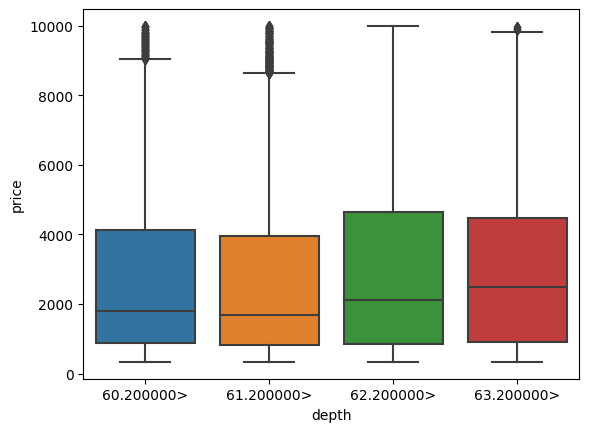

In [30]:
sns.boxplot(y='price',data=df_dimond,x=depth_bins)

In [31]:
#sns.relplot(x='carat',y='price',data=df_dimond,col=depth_bins,kind='scatter',col_wrap=2)

In [32]:
carat_bins =pd.cut(x=df_dimond['carat'] , bins=[0.250000 , 0.500000 ,0.750000 ,1.000000,1.250000,1.500000,1.750000],
        labels= ['0.250000>',' 0.500000>','0.750000>','1.000000>','1.250000>','1.500000>'])
carat_bins

0               NaN
1         0.250000>
2         0.250000>
3               NaN
4               NaN
            ...    
43035     0.500000>
43036     0.500000>
43037     0.500000>
43038     0.750000>
43039     0.500000>
Name: carat, Length: 34532, dtype: category
Categories (6, object): ['0.250000>' < ' 0.500000>' < '0.750000>' < '1.000000>' < '1.250000>' <
                         '1.500000>']

<Axes: xlabel='carat', ylabel='price'>

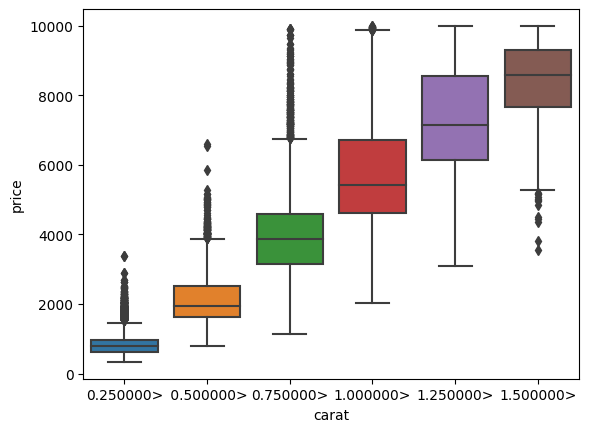

In [33]:
sns.boxplot(y='price',data=df_dimond,x=carat_bins)

In [34]:
#sns.relplot(x='depth',y='price',data=df_dimond,col=carat_bins,kind='scatter',col_wrap=2)

In [35]:
table_bins =pd.cut(x=df_dimond['table'] , bins=[53,54 ,55 ,56,57,58,59,60,61],
        labels= ['53>',' 54>','55>','56>','57>','58>','59>','60>'])
table_bins

0         60>
1         57>
2         57>
3         56>
4         56>
         ... 
43035     58>
43036     56>
43037     54>
43038     57>
43039     54>
Name: table, Length: 34532, dtype: category
Categories (8, object): ['53>' < ' 54>' < '55>' < '56>' < '57>' < '58>' < '59>' < '60>']

<Axes: xlabel='table', ylabel='price'>

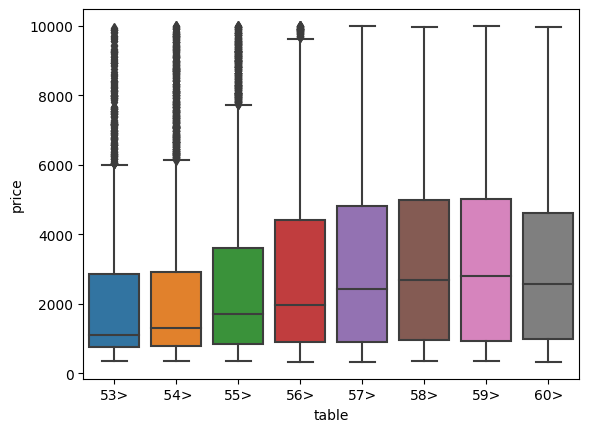

In [36]:
sns.boxplot(y='price',data=df_dimond,x=table_bins)

In [37]:
len(df_dimond)

34532

In [38]:
df_dimond.corr()

<ipython-input-38-d73ca1910810>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dimond.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.063190,0.191705,0.928602,0.985331,0.984953,0.981910
depth,0.063190,1.000000,-0.164268,0.032914,0.017764,0.015729,0.111589
table,0.191705,-0.164268,1.000000,0.153064,0.183549,0.177412,0.164149
price,0.928602,0.032914,0.153064,1.000000,0.909333,0.910539,0.904702
x,0.985331,0.017764,0.183549,0.909333,1.000000,0.997716,0.991989
y,0.984953,0.015729,0.177412,0.910539,0.997716,1.000000,0.991058
z,0.981910,0.111589,0.164149,0.904702,0.991989,0.991058,1.000000


In [39]:
df_dimond.corr()['price'].sort_values(ascending=False)

<ipython-input-39-2ef292993aa4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dimond.corr()['price'].sort_values(ascending=False)


price    1.000000
carat    0.928602
y        0.910539
x        0.909333
z        0.904702
table    0.153064
depth    0.032914
Name: price, dtype: float64

<ipython-input-40-f7c66e262926>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dimond.corr(),annot=True,cmap='Blues',fmt='.2f')


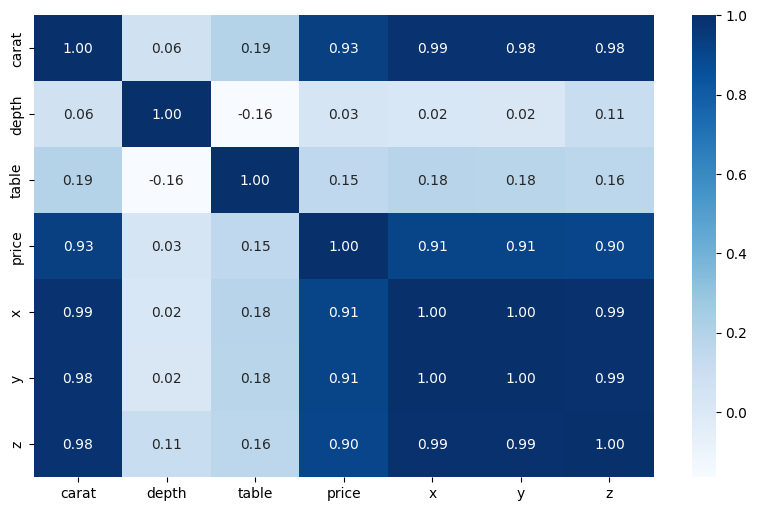

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df_dimond.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

In [41]:
###feature engeneering

In [42]:
df_dimond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [43]:
df_dimond['size']=df_dimond['x']*df_dimond['y']*df_dimond['z']


In [44]:
df_dimond.corr()['price'].sort_values(ascending=False)

<ipython-input-44-2ef292993aa4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dimond.corr()['price'].sort_values(ascending=False)


price    1.000000
size     0.928800
carat    0.928602
y        0.910539
x        0.909333
z        0.904702
table    0.153064
depth    0.032914
Name: price, dtype: float64

In [45]:
df_dimond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870


In [46]:
df_dimond =df_dimond.drop([ 'x' , 'y' ,'z'], axis=1)

Text(0, 0.5, 'price')

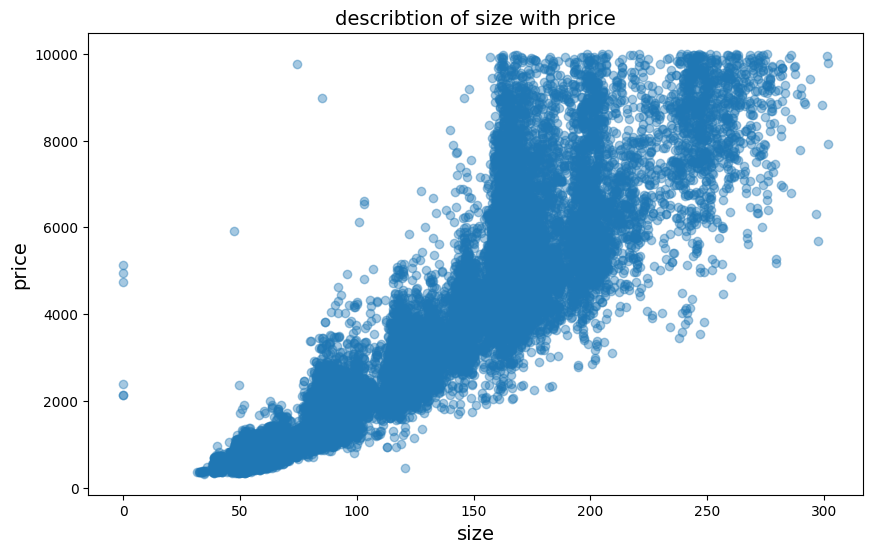

In [47]:
plt.figure(figsize=(10,6))

plt.scatter(df_dimond['size'],df_dimond['price'],alpha=0.4)


plt.title('describtion of size with price' ,fontsize=14,c='k')
plt.xlabel('size',fontsize=14,c='k')
plt.ylabel('price',fontsize=14,c='k')


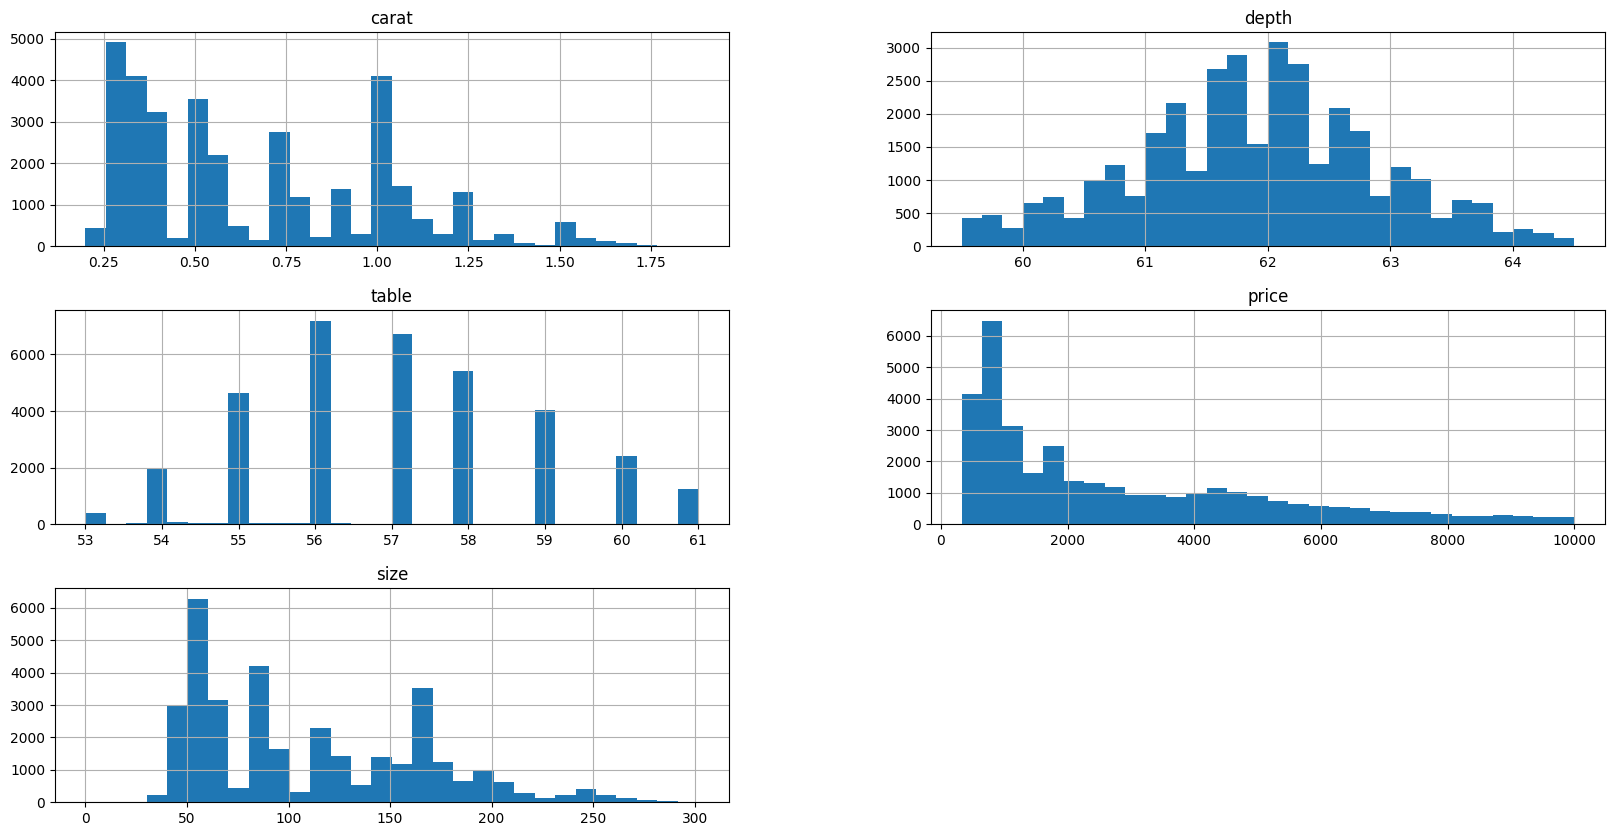

In [48]:
df_dimond.hist(bins=30,figsize=(20,10))
plt.show()

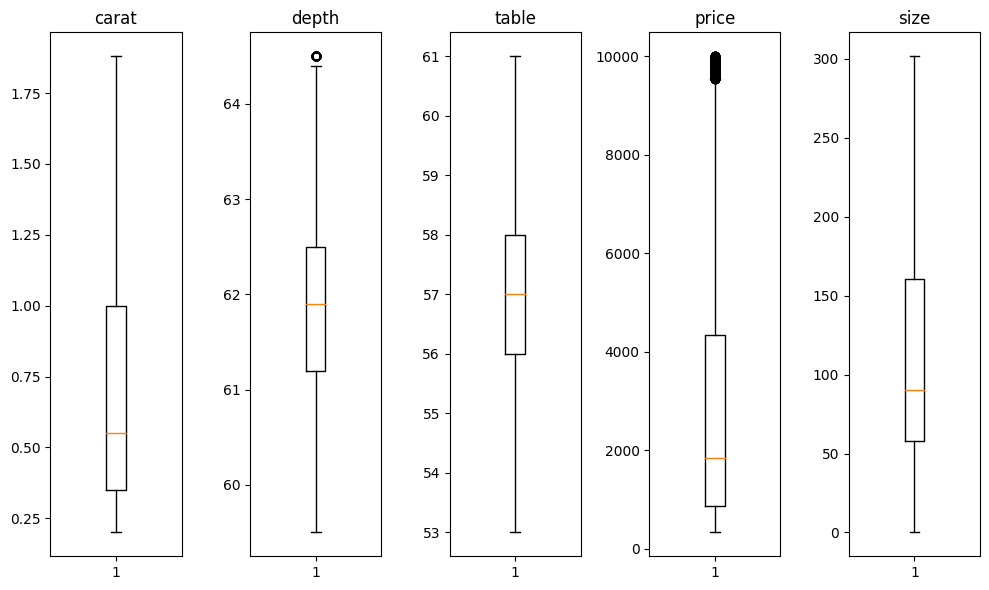

In [49]:
import matplotlib.pyplot as plt

# استخراج الأعمدة الرقمية
numeric_columns = df_dimond.select_dtypes(include=['float64', 'int64']).columns

# عدد الصفوف والأعمدة في الشكل النهائي
rows = 1
cols = len(numeric_columns)

# إعداد المخططات المتعددة
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# رسم مخطط مربع الشوكة لكل عمود
for i, column in enumerate(numeric_columns):
    ax = axes[i] if cols > 1 else axes  # التعامل مع عدد الأعمدة
    ax.boxplot(df_dimond[column])
    ax.set_title(column)

# تحسين تنسيق المخططات
plt.tight_layout()

# عرض المخططات
plt.show()


In [50]:
len(df_dimond)

34532

In [51]:
######################################################################
#end_preprocessing
######################################################################

In [52]:
X=df_dimond.drop(columns='price',axis=1)
y=df_dimond['price']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True ,test_size=0.15 , random_state=42)

In [54]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (29352, 7)
y_train shape (29352,)
X_test shape (5180, 7)
y_test shape (5180,)


In [55]:
###deatiling with null

In [56]:
num_cols=[col for col in X_train.columns if X_train[col].dtype in ['int32', 'int64' , 'float32','float64']]
categ_cols=[col for col in X_train.columns if X_train[col].dtype not in ['int32', 'int64' , 'float32','float64']]

In [57]:
num_cols

['carat', 'depth', 'table', 'size']

In [58]:
categ_cols

['cut', 'color', 'clarity']

<Axes: >

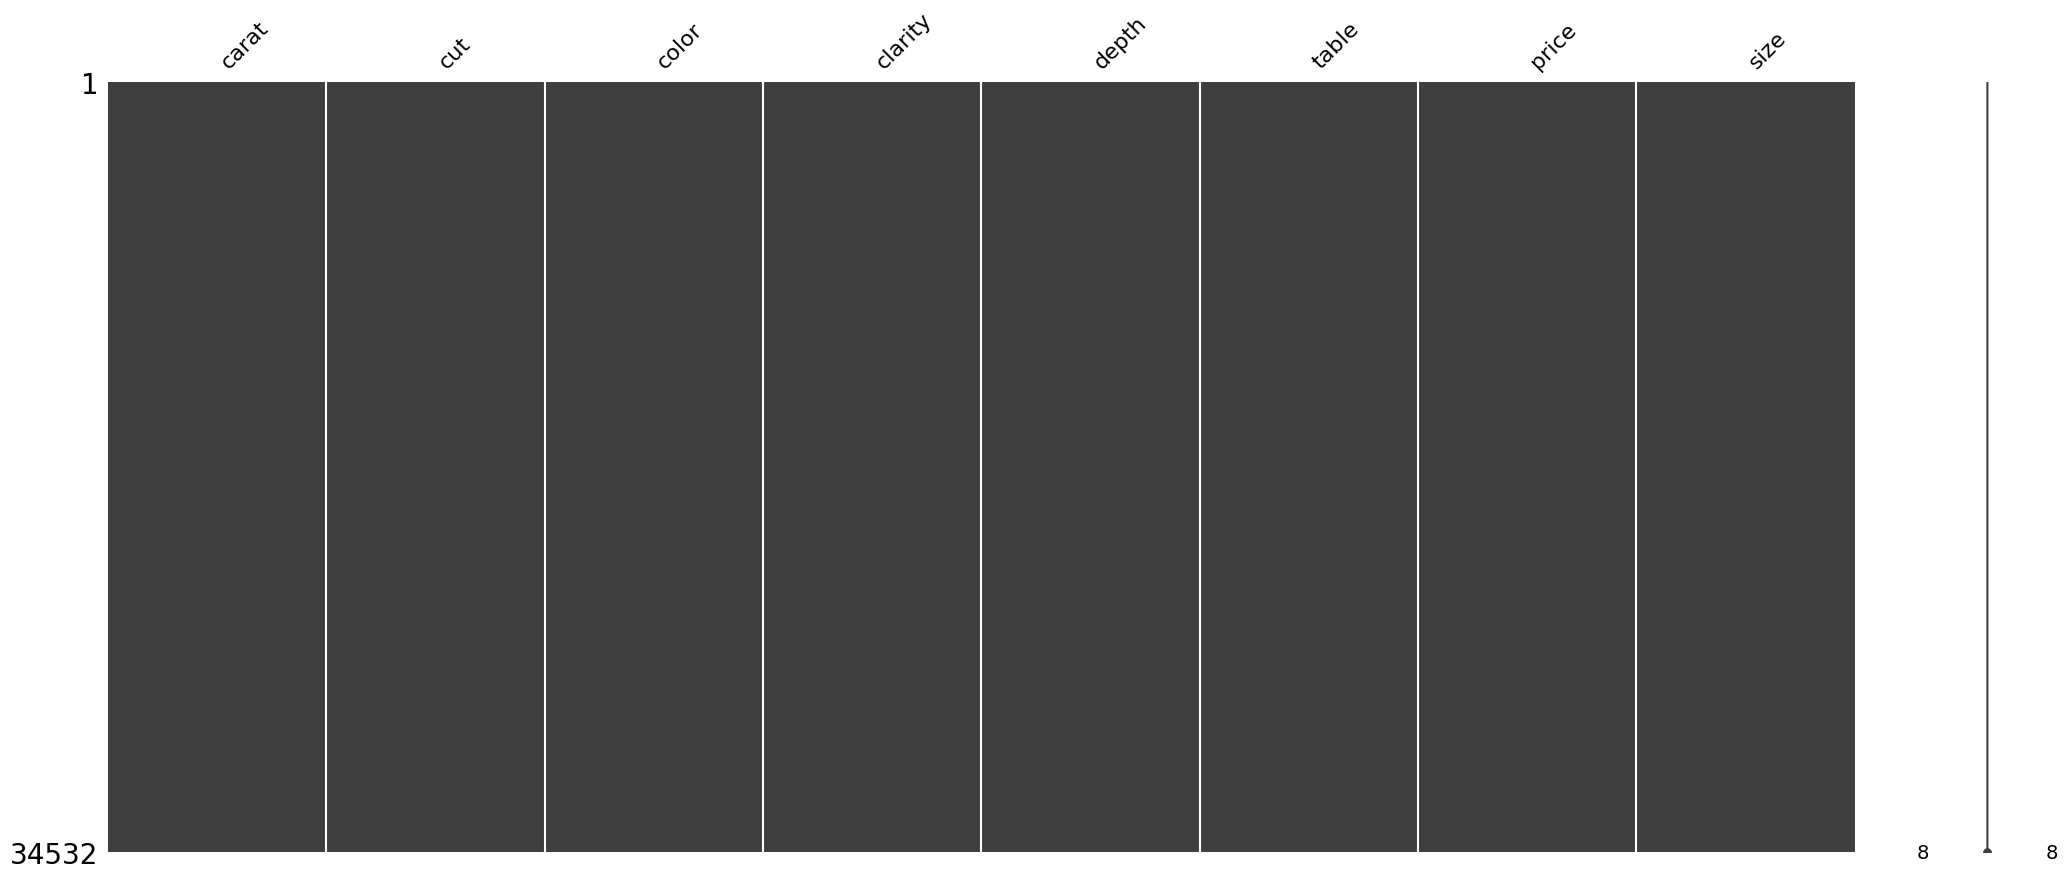

In [59]:
missingno.matrix(df_dimond)

In [60]:
# imputer = SimpleImputer(strategy='median')
# # imputer.fit(X_train[num_cols])

In [61]:
###median values for cols
# imputer.statistics_

In [62]:
# # X_train_filled = imputer.transform(X_train[num_cols])

# X_train_filled = imputer.fit_transform(X_train[num_cols])

# X_test_filled = imputer.transform(X_test[num_cols])

# X_train_filled

In [63]:
# pd.DataFrame(X_train_filled)

In [64]:
# pd.DataFrame(X_train_filled).isna().sum()

In [65]:
###standarized the feature

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled = scaler.transform(X_train[num_cols])

X_test_scaled = scaler.transform(X_test[num_cols])

In [66]:
scaler.scale_

array([ 0.34493235,  0.98982806,  1.82689239, 55.69381793])

In [67]:
X_train[num_cols].std(axis=0)

carat     0.344938
depth     0.989845
table     1.826924
size     55.694767
dtype: float64

In [68]:
pd.DataFrame(X_train_scaled)

,0,1,2,3
0,-1.077972,0.729938,0.527683,-1.104200
1,0.110667,0.931993,1.075060,0.055008
2,-0.730078,-0.886505,-0.567073,-0.719263
3,0.110667,0.527883,1.075060,0.113553
4,0.980402,0.325827,-0.019695,1.007075
...,...,...,...,...
29347,-1.048981,1.033021,-0.019695,-1.053300
29348,1.038385,-1.290615,1.622438,1.043505
29349,1.589218,0.325827,-0.567073,1.646393
29350,0.197640,-0.078283,-1.114450,0.226363


In [69]:
num_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='median') ),
             ('scaler' ,StandardScaler())
         ])

X_train_num = num_pipline.fit_transform(X_train[num_cols])
X_test_num = num_pipline.transform(X_test[num_cols])

In [70]:
ohe=OneHotEncoder(sparse=False)
ohe.fit(X_train[categ_cols].values)

X_train_one_hot = ohe.transform(X_train[categ_cols].values)
X_test_one_hot = ohe.transform(X_test[categ_cols].values)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
X_test_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [72]:
# ohe=OneHotEncoder(sparse=False)
# ohe.fit(X_train[categ_cols].values)

# X_train_one_hot = ohe.transform(X_train[categ_cols].values)
# X_test_one_hot = ohe.transform(X_test[categ_cols].values)

In [73]:
categ_pipline = Pipeline(steps =
         [
             ('imputer' ,SimpleImputer(strategy='constant',fill_value='missing') ),
             ('ohe' ,OneHotEncoder(sparse=False))
         ])

X_train_cat = categ_pipline.fit_transform(X_train[categ_cols])
X_test_cat = categ_pipline.transform(X_test[categ_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
X_train_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [75]:
X_train_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [76]:
X_test_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [77]:
X_test_scaled[0]

array([-0.9909986 , -0.28033864,  1.62243792, -1.00272678])

In [78]:
f = np.column_stack((X_train_scaled,X_train_cat))


In [79]:
f_test=np.column_stack((X_test_scaled,X_test_cat))

In [80]:
pd.DataFrame(f)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.077972,0.729938,0.527683,-1.104200,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.110667,0.931993,1.075060,0.055008,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.730078,-0.886505,-0.567073,-0.719263,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.110667,0.527883,1.075060,0.113553,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.980402,0.325827,-0.019695,1.007075,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29347,-1.048981,1.033021,-0.019695,-1.053300,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29348,1.038385,-1.290615,1.622438,1.043505,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29349,1.589218,0.325827,-0.567073,1.646393,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29350,0.197640,-0.078283,-1.114450,0.226363,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
pd.DataFrame(f_test)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.990999,-0.280339,1.622438,-1.002727,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.048981,1.235076,-0.019695,-1.069241,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.382184,0.123772,-0.567073,-0.392695,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.183341,1.033021,1.075060,1.206879,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.208236,0.123772,-1.114450,-0.212956,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,-1.019990,-1.391643,1.075060,-1.034506,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5176,-0.817051,0.022744,-0.019695,-0.823938,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5177,1.270314,0.224800,-0.019695,1.267231,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5178,-0.469157,-1.593698,0.527683,-0.480047,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# import pandas as pd

# # Assuming you have a DataFrame named 'df'
# f.to_csv('filename.csv', index=False)

In [ ]:
#######################################################################
###             Randomforest regression with Grid                   ###
#######################################################################

# choose Rndomforest best parameter from grid search

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score
# import dask

# # client = dask.distributed.Client()

# param_grid = [
#     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#   ]

# forest_reg = RandomForestRegressor(random_state=42)


# # Set the Dask client as the backend for Joblib
# # joblib.parallel_backend('dask')
# grid_search1 = GridSearchCV(forest_reg, param_grid, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)
# # grid_search = GridSearchCV(classifier, param_grid, cv=5)

# grid_search1.fit(f, y_train)

# # grid_search1.fit(f, y_train)




In [ ]:
grid_search_params1 = grid_search1.best_params_
print('best_xgb_params -- ', grid_search_params1)

In [ ]:
best_grid_search1 = grid_search1.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search1)

#apply  RandomForestRegressor with best parameter

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)
forest_reg.fit(f, y_train)



In [94]:
import pickle

In [95]:
# Assuming your trained model object is named 'model'
with open('forest_reg_model.pkl', 'wb') as file:
    pickle.dump(forest_reg, file)

# Cross-validation on forest_reg

In [ ]:
scores = cross_val_score(estimator=forest_reg, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=forest_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=forest_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=forest_reg, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

# # # use AUC as scoring metric
# scores = cross_val_score(forest_reg,  X=f, y=y_train, cv=5, scoring = 'roc_auc', error_score='raise')
# print('Cross-validation (AUC)', scores)

# # use recall as scoring metric
# scores = cross_val_score(forest_reg, X=f, y=y_train ,cv=5, scoring = 'recall' , error_score='raise')
# print('Cross-validation (recall)', scores)


Cross-validation (accuracy) 0.9811124438353668
Cross-validation (RMSE): 327.72313631465823
Cross-validation (MAE): 195.53644820916506
Cross-validation (R2 score): 0.9811124438353668


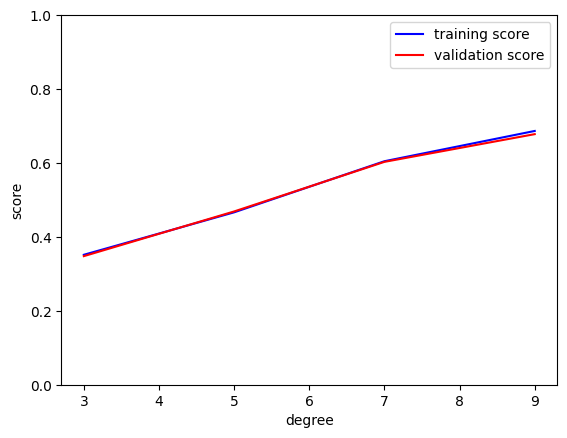

In [96]:

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the RandomForestRegressor model
# forest_reg = RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

# Define the parameter grid for validation curve
param_name = 'max_depth'
param_range = [3, 5, 7, 9]

# Compute the validation curve
train_scores, val_scores = validation_curve(forest_reg, X_train_poly, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)


degree = np.arange(0, 21)
plt.plot(param_range , np.median(train_scores, 1), color='blue', label='training score')
plt.plot(param_range , np.median(val_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

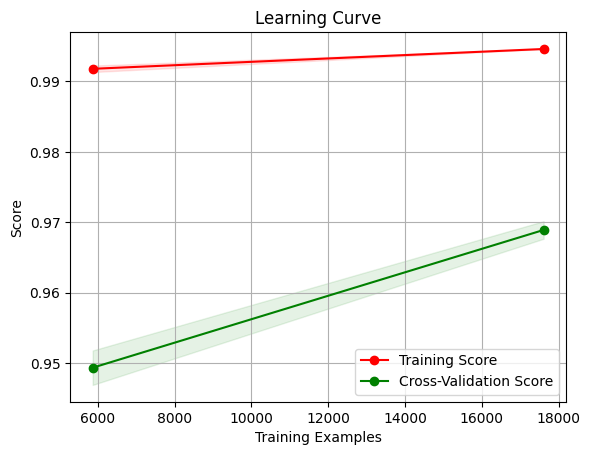

In [97]:
from sklearn.metrics import r2_score

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the parameter grid for learning curve (optional)
train_sizes, train_scores, val_scores = learning_curve(forest_reg, X_train_poly, y_train,
                                                      train_sizes=[ 0.3, 0.9],
                                                      cv=3,
                                                      scoring='r2',  # Use r2_score for regression
                                                      shuffle=True)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

# Choose SGDregression beat parameter with gridsearch

In [ ]:
# param_grid2 = {
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
#     'l1_ratio': [0.25, 0.5, 0.75],
#     'max_iter': [1000, 2000, 3000],
#     'tol': [1e-3, 1e-4, 1e-5]
#     # Add more parameters as needed
# }


# 1
# sgd_reg = SGDRegressor(penalty='l2',eta0=0.001 ,  shuffle=True, max_iter=10000)

# grid_search = GridSearchCV(sgd_reg, param_grid2, cv=5,
#                            scoring='neg_mean_squared_error', return_train_score=True)
# grid_search.fit(f, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(eta0=0.001, max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': [0.25, 0.5, 0.75],
                         'max_iter': [1000, 2000, 3000],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search_params = grid_search.best_params_
print('best_xgb_params -- ', grid_search_params)

best_xgb_params --  {'alpha': 0.0001, 'l1_ratio': 0.75, 'max_iter': 2000, 'tol': 1e-05}


In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  SGDRegressor(eta0=0.001, l1_ratio=0.75, max_iter=2000, tol=1e-05)



#  apply SGDRegressor with best parameter


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.ensemble import VotingRegressor

sgd_reg1 = SGDRegressor(penalty='l2' , eta0=0.001, l1_ratio=0.75, max_iter=2000, tol=1e-05)
# sgd_reg.fit(f, y_train)
sgd_reg2 = SGDRegressor(penalty='l1' , eta0=0.001, l1_ratio=0.75, max_iter=2000, tol=1e-05)

ensemble = VotingRegressor([('model1', sgd_reg1), ('model2', sgd_reg2)])

best_score = float('inf')
best_model = None
num_epochs = 100

for epoch in range(num_epochs):
    ensemble.fit(f, y_train)
    y_val_pred = ensemble.predict(f_test)
    score = mean_squared_error(y_test, y_val_pred)

    if score < best_score:
        best_score = score
        best_model = ensemble
    else:
        break




# Cross-validation on sgd_reg

In [85]:
scores = cross_val_score(estimator=best_model, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())


mse_scores = -cross_val_score(estimator=best_model, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=best_model, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=best_model, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())


Cross-validation (accuracy) 0.9268391606441504
Cross-validation (RMSE): 645.201372999197
Cross-validation (MAE): 460.9502680598192
Cross-validation (R2 score): 0.9268545435612102


In [87]:

from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the SGDRegressor model
# sgd_reg = SGDRegressor(eta0=0.001, l1_ratio=0.75, max_iter=2000, tol=1e-05)

# Define the parameter grid for validation curve
param_name = 'alpha'
param_range = [0.0001, 0.001, 0.01, 0.1]

# Compute the validation curve
train_scores, val_scores = validation_curve(best_model, X_train_poly, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)

plt.plot(param_range, np.median(train_scores, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_scores, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

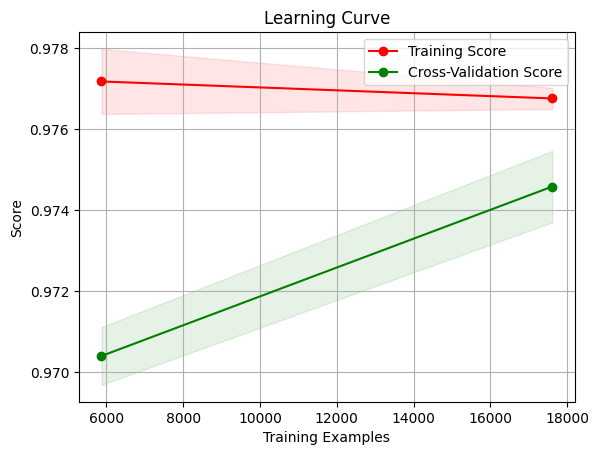

In [89]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the parameter grid for learning curve (optional)
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train_poly, y_train,
                                                      train_sizes=[ 0.3, 0.9],
                                                      cv=3,
                                                      scoring='r2',  # Use r2_score for regression
                                                      shuffle=True)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

In [ ]:
# Assuming your trained model object is named 'model'
with open('sgd_reg_model.pkl', 'wb') as file:
    pickle.dump(sgd_reg, file)

# Linear Regression

In [ ]:

lin_reg = LinearRegression()
lin_reg.fit(f, y_train)  ## train



In [ ]:
scores = cross_val_score(estimator=lin_reg, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())


mse_scores = -cross_val_score(estimator=lin_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=lin_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=lin_reg, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

# ## Check scores of this Model (RMSE) using (cross_val_score)
# rmse_scores_lin = cross_val_score(estimator=lin_reg, X=f, y=y_train,
#                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
# rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
# rmse_scores_lin = np.sqrt(rmse_scores_lin)
# print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
# print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

# print('****'*30)

# ## Get Prediction using (cross_val_predict)
# y_pred_lin = cross_val_predict(estimator=lin_reg, X=f, y=y_train, cv=5, method='predict', n_jobs=-1)
# ## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
# ## take care of this point --> don't use .predict when you are using (crossValidation)
# rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
# print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D



Cross-validation (accuracy) 0.9269788075772265
Cross-validation (RMSE): 644.5892838998544
Cross-validation (MAE): 461.4672682711375
Cross-validation (R2 score): 0.9269788075772265


In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the SGDRegressor model
# sgd_reg = SGDRegressor(eta0=0.001, l1_ratio=0.75, max_iter=2000, tol=1e-05)

# Define the parameter grid for validation curve
param_name = 'alpha'
param_range = [0.0001, 0.001, 0.01, 0.1]

# Compute the validation curve
train_scores, val_scores = validation_curve(lin_reg, X_train_poly, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)

plt.plot(param_range, np.median(train_scores, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_scores, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

 # redge regression  with grid


In [ ]:
# regressor = Ridge()

# param_grid = {
#     'alpha': [0.1, 1.0, 10.0],
#     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#     'tol': [1e-3, 1e-4, 1e-5]
#     # Add more parameters as needed
# }

# grid_search = GridSearchCV(regressor, param_grid, cv=5, error_score='raise')
# grid_search.fit(f, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.1, 'solver': 'sag', 'tol': 0.001}
Best Score: 0.9165653382771775


In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  Ridge(alpha=0.1, solver='sag', tol=0.001)


# apply Ridge with beat parameter

In [ ]:
from sklearn.metrics import accuracy_score


redg = Ridge(alpha=0.1, solver='sag', tol=0.001)
redg.fit(f, y_train)


# rmse_scores_tuned_xgb = cross_val_score(estimator=redg, X=f, y=y_train,
#                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative


# rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
# rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
# print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
# print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')



Ridge(alpha=0.1, solver='sag', tol=0.001)

In [ ]:
scores = cross_val_score(estimator=redg, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=redg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=redg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=redg, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

Cross-validation (accuracy) 0.9269769938582252
Cross-validation (RMSE): 644.5902999139669
Cross-validation (MAE): 461.48622245929255
Cross-validation (R2 score): 0.9269816592645819


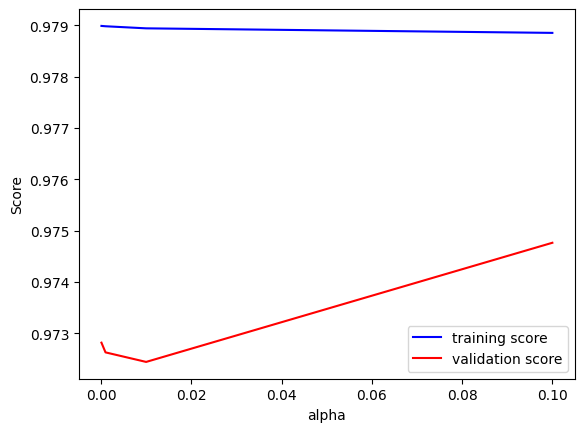

In [ ]:
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the Ridge model
ridge_reg = Ridge(alpha=1.0)

# Define the parameter grid for validation curve
param_name = 'alpha'
param_range = [0.0001, 0.001, 0.01, 0.1]

# Compute the validation curve
train_scores, val_scores = validation_curve(ridge_reg, X_train_poly, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)

plt.plot(param_range, np.median(train_scores, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_scores, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

# Lasso with grid search


In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  Lasso(alpha=0.001, fit_intercept=False)


# apply Lasso with best parameter

In [ ]:

lasso = Lasso(alpha=0.001, fit_intercept=False)
lasso.fit(f, y_train)


# rmse_scores_tuned_xgb = cross_val_score(estimator=lasso, X=f, y=y_train,
#                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative


# rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
# rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
# print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
# print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.939e+09, tolerance: 3.991e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001, fit_intercept=False)

# crossvalidation with Lasso

In [ ]:
scores = cross_val_score(estimator=lasso, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=lasso, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=lasso, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=lasso, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.614e+09, tolerance: 3.152e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.710e+09, tolerance: 3.179e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+09, tolerance: 3.230e

Cross-validation (accuracy) 0.9269848663654413
Cross-validation (RMSE): 644.5628016864015
Cross-validation (MAE): 461.46938710338947
Cross-validation (R2 score): 0.9269848663654411


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+09, tolerance: 3.380e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.486e+09, tolerance: 3.380e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+09, tolerance: 3.380e

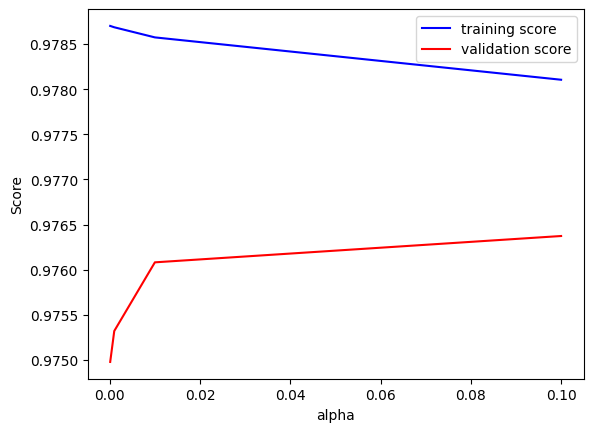

In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the Lasso model


# Define the parameter grid for validation curve
param_name = 'alpha'
param_range = [0.0001, 0.001, 0.01, 0.1]

# Compute the validation curve
train_scores, val_scores = validation_curve(lasso, X_train_poly, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)

plt.plot(param_range, np.median(train_scores, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_scores, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# Create the Gaussian Naive Bayes regressor
nb_reg = GaussianNB()

# Fit the model to the training data
nb_reg.fit(f, y_train)

# Make predictions on the test data
y_pred = nb_reg.predict(f_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2717648.4891891894


In [ ]:

nb_classifier = GaussianNB()

# Define the parameter grid for validation curve
param_name = 'var_smoothing'
param_range = np.logspace(-9, 0, 10)

# Compute the validation curve
train_scores, val_scores = validation_curve(nb_classifier, X_train, y_train,
                                            param_name=param_name,
                                            param_range=param_range,
                                            cv=7)

# Plot the validation curve
plt.plot(param_range, np.median(train_scores, axis=1), color='blue', label='training score')
plt.plot(param_range, np.median(val_scores, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.xscale('log')
plt.xlabel(param_name)
plt.ylabel('Score')
plt.show()

# DecisionTreeClassifier whith grid

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import dask.distributed

In [ ]:
# # Create the Decision Tree Regressor
# regressor = DecisionTreeRegressor()

# # Define the parameter grid for grid search
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10]
#     # Add more parameters as needed
# }

# # Create the GridSearchCV object with error_score='raise'
# grid_search = GridSearchCV(regressor, param_grid, error_score='raise')

# # Fit the grid search to the training data
# grid_search.fit(f, y_train)



# best_param = grid_search.best_params_
# best_grid = grid_search.best_estimator_


# # Print the best hyperparameters and the corresponding score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  DecisionTreeRegressor(max_depth=7, min_samples_split=10)


# apply DecisionTreeClassifier with best parameter

In [ ]:

DST = DecisionTreeRegressor(max_depth=7, min_samples_split=10)
DST.fit(f, y_train)


# rmse_scores_tuned_xgb = cross_val_score(estimator=DST, X=f, y=y_train,
#                                cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative


# rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
# rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
# print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
# print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')


DecisionTreeRegressor(max_depth=7, min_samples_split=10)

# crossval with DTC classifier

In [ ]:
scores = cross_val_score(estimator=DST, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=DST, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=DST, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=DST, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

Cross-validation (accuracy) 0.9469989964526491
Cross-validation (RMSE): 549.012300364407
Cross-validation (MAE): 330.71040005424936
Cross-validation (R2 score): 0.9470002875927254


# KNeighbors with grid search

In [100]:
from sklearn.neighbors import KNeighborsRegressor


regressor = KNeighborsRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    # Add more parameters as needed
}


In [ ]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(regressor, param_grid, cv=5)
# grid_search.fit(f, y_train)


# best_param = grid_search.best_params_
# best_grid = grid_search.best_estimator_


# # Print the best hyperparameters and the corresponding score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score: 0.9664118697159209


In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')


# apply KNeighborsClassifier with best parameter

In [101]:
KNC = KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
KNC.fit(f, y_train)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

# crossval with KNeighborsClassifier classifier

In [ ]:
scores = cross_val_score(estimator=KNC, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=KNC, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=KNC, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=KNC, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

Cross-validation (accuracy) 0.9664118697159209
Cross-validation (RMSE): 437.1014697564894
Cross-validation (MAE): 260.83443419373157
Cross-validation (R2 score): 0.9664118697159209


In [ ]:
from sklearn.metrics import r2_score

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the parameter grid for learning curve (optional)
train_sizes, train_scores, val_scores = learning_curve(KNC, X_train_poly, y_train,
                                                      train_sizes=[ 0.3, 0.9],
                                                      cv=3,
                                                      scoring='r2',  # Use r2_score for regression
                                                      shuffle=True)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

# XGboost with grid

In [84]:
import xgboost as xgb

In [ ]:
# xgb_reg = xgb.XGBRegressor()

# # Define the parameter grid for grid search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'max_depth': [3, 5, 7]
# }

# # Perform grid search
# grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(f, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

In [ ]:
best_grid_search = grid_search.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_grid_search)

best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


# XGBoost with best paraameter

In [ ]:
#  XGBRegressor( learning_rate=0.1 , max_depth=7,
#              n_estimators=200)

In [85]:
xgb_reg = xgb.XGBRegressor( learning_rate=0.1 , max_depth=7,
             n_estimators=200)
xgb_reg.fit(f, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# XGBoost with Cross val


In [ ]:
scores = cross_val_score(estimator=xgb_reg, X=f, y=y_train, cv=5)
print('Cross-validation (accuracy)', scores.mean())

mse_scores = -cross_val_score(estimator=xgb_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

mse_scores = np.sqrt(mse_scores)

mae_scores = -cross_val_score(estimator=xgb_reg, X=f, y=y_train,
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

r2_scores = cross_val_score(estimator=xgb_reg, X=f, y=y_train,
                               cv=5, scoring='r2', n_jobs=-1)

# Print the scores
print("Cross-validation (RMSE):", mse_scores.mean())
print("Cross-validation (MAE):", mae_scores.mean())
print("Cross-validation (R2 score):", r2_scores.mean())

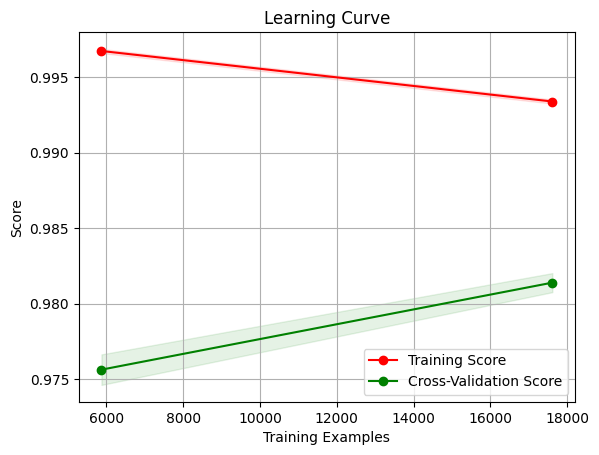

In [92]:
from sklearn.metrics import r2_score

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(f)

# Define the parameter grid for learning curve (optional)
train_sizes, train_scores, val_scores = learning_curve(xgb_reg, X_train_poly, y_train,
                                                      train_sizes=[ 0.3, 0.9],
                                                      cv=3,
                                                      scoring='r2',  # Use r2_score for regression
                                                      shuffle=True)

# Calculate the mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g",
         label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

In [103]:
from sklearn.ensemble import VotingRegressor

In [104]:
vooting = VotingRegressor(
    estimators=[('lr', sgd_reg), ('dt', KNC), ('nb', forest_reg)])

vooting.fit(f, y_train)

VotingRegressor(estimators=[('lr',
                             SGDRegressor(eta0=0.001, l1_ratio=0.75,
                                          max_iter=2000, tol=1e-05)),
                            ('dt',
                             KNeighborsRegressor(n_neighbors=7, p=1,
                                                 weights='distance')),
                            ('nb',
                             RandomForestRegressor(max_features=8,
                                                   n_estimators=30,
                                                   random_state=42))])